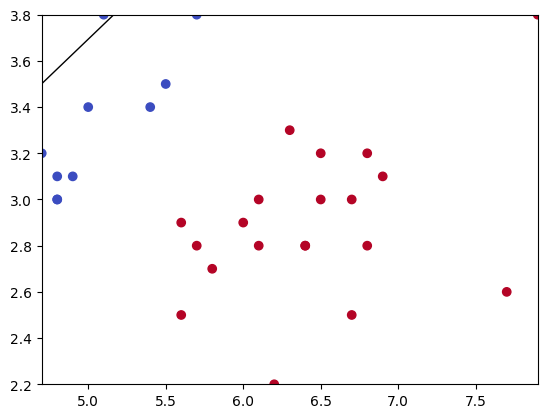

Predicted  0   1
Actual          
0          1   9
1          0  20
Accuracy:  0.7


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2] # Only take first two features for demonstration purposes
y = (iris.target != 0) * 1  # convert to binary classification

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to X_train and X_test
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function and gradient
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
    grad = (1/m) * X.T.dot(h-y)
    return J, grad

# Define normal equation function
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Initialize theta using the normal equation
theta_initial = normal_equation(X_train, y_train)

# Compute the cost and gradient for the initial theta
J, grad = cost_function(theta_initial, X_train, y_train)

# Predict the classes for the test set
y_pred = (sigmoid(X_test.dot(theta_initial)) >= 0.5) * 1

# Compute the confusion matrix
confusion_matrix = pd.crosstab(index=y_test, columns=y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot the decision boundary
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap='coolwarm')
x1_min, x1_max = X_test[:,1].min(), X_test[:,1].max(),
x2_min, x2_max = X_test[:,2].min(), X_test[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(theta_initial))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='black')
plt.show()

# Print the confusion matrix and accuracy
print(confusion_matrix)
print("Accuracy: ", (y_test == y_pred).mean())
